In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data file
file_path = '/Users/lanahuyen/UCB Bootcamp/Project 1/Group_Project_1/Resources/merged_df.csv'
data = pd.read_csv(file_path)

# List of valid industries
valid_industries = [
    'Artificial intelligence', 'Auto & transportation', 'Consumer & retail', 'Cybersecurity', 'Data management & analytics',
    'E-commerce & direct-to-consumer', 'Edtech', 'Hardware', 'Health', 'Internet', 'Internet software & services',
    'Mobile & telecommunications', 'Other', 'Supply chain, logistics, & delivery', 'Travel'
]
data.head()

,Unnamed: 0,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
# Clean the data
cleaned_data = data[
    (data['Industry'].isin(valid_industries)) &
    (data[['2022_Valuation', '2023_Valuation', '2024_Valuation']].notnull().all(axis=1))
]

# Convert valuation columns to numeric values (removing any non-numeric characters)
cleaned_data['2022_Valuation'] = cleaned_data['2022_Valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
cleaned_data['2023_Valuation'] = cleaned_data['2023_Valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
cleaned_data['2024_Valuation'] = cleaned_data['2024_Valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)

cleaned_data.head()

/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/3777406106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['2022_Valuation'] = cleaned_data['2022_Valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/3777406106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['2023_Valuation'] = cleaned_data['2023_Valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/6p/h0

,Unnamed: 0,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,140.0,225.0,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,127.0,137.0,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,100.0,66.0,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
4,4,Canva,40.0,40.0,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
7,7,Databricks,38.0,31.0,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."


In [5]:
# Calculate growth columns
cleaned_data['22 Growth'] = ((cleaned_data['2023_Valuation'] - cleaned_data['2022_Valuation']) / cleaned_data['2022_Valuation']) * 100
cleaned_data['23 Growth'] = ((cleaned_data['2024_Valuation'] - cleaned_data['2023_Valuation']) / cleaned_data['2023_Valuation']) * 100
cleaned_data['Total Growth'] = ((cleaned_data['2024_Valuation'] - cleaned_data['2022_Valuation']) / cleaned_data['2022_Valuation']) * 100

/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/127568932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['22 Growth'] = ((cleaned_data['2023_Valuation'] - cleaned_data['2022_Valuation']) / cleaned_data['2022_Valuation']) * 100
/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/127568932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['23 Growth'] = ((cleaned_data['2024_Valuation'] - cleaned_data['2023_Valuation']) / cleaned_data['2023_Valuati

In [6]:
cleaned_data.head()

,Unnamed: 0,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,22 Growth,23 Growth,Total Growth
0,0,ByteDance,140.0,225.0,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",60.714286,0.000000,60.714286
1,1,SpaceX,127.0,137.0,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",7.874016,9.489051,18.110236
2,2,SHEIN,100.0,66.0,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",-34.000000,0.000000,-34.000000
4,4,Canva,40.0,40.0,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",0.000000,-36.500000,-36.500000
7,7,Databricks,38.0,31.0,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",-18.421053,38.709677,13.157895


In [8]:
# Statistical analysis
# Group by Industry and calculate mean and median growth rates
industry_growth_stats = cleaned_data.groupby('Industry').agg({
    '22 Growth': ['mean', 'median'],
    '23 Growth': ['mean', 'median'],
    'Total Growth': ['mean', 'median']
}).reset_index()

# Set the style for the plots
sns.set(style="whitegrid")

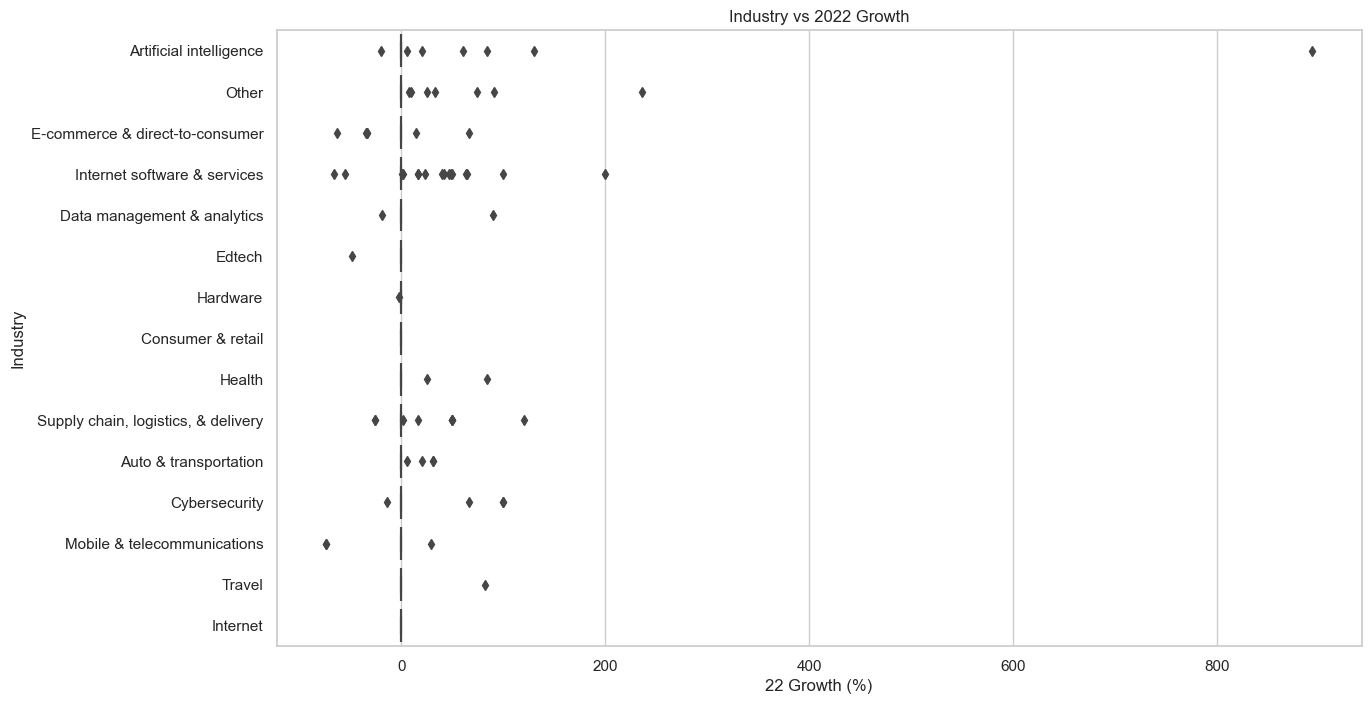

In [9]:
# Industry vs 22 Growth
plt.figure(figsize=(14, 8))
sns.boxplot(x='22 Growth', y='Industry', data=cleaned_data)
plt.title('Industry vs 2022 Growth')
plt.xlabel('22 Growth (%)')
plt.ylabel('Industry')
plt.show()

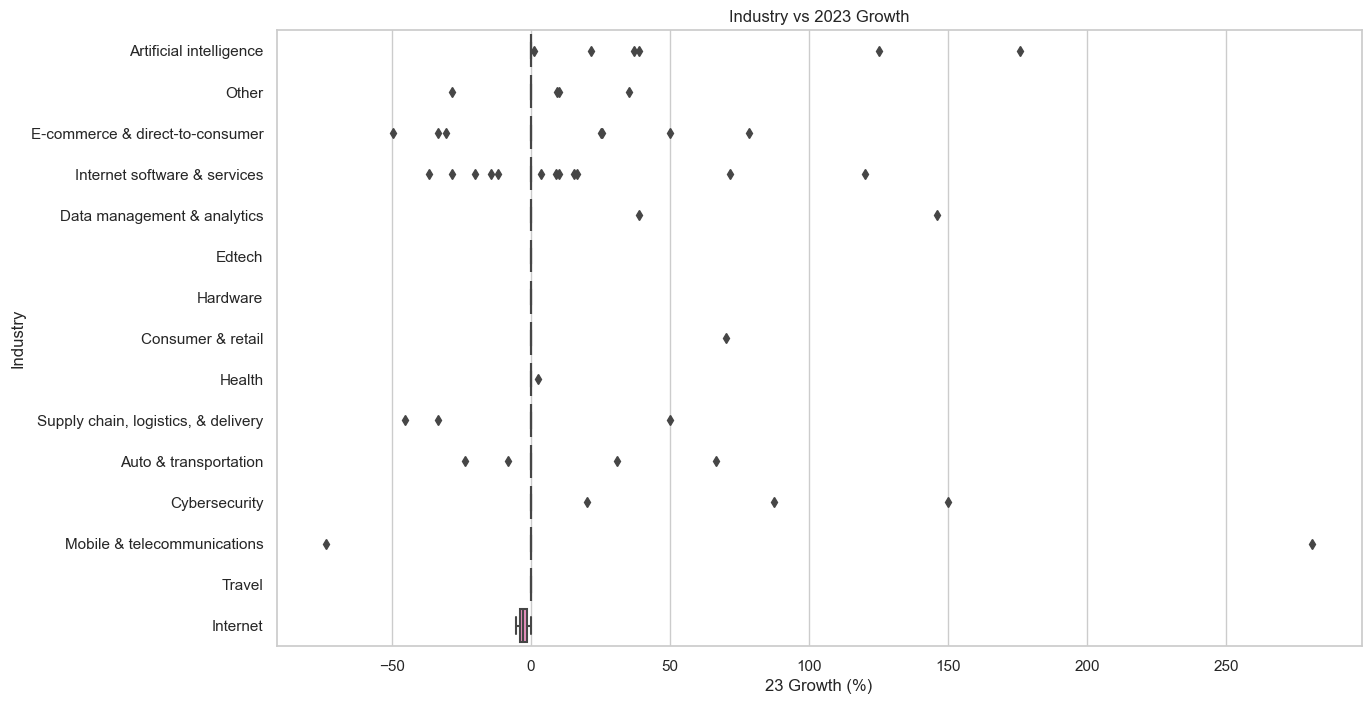

In [10]:
# Industry vs 23 Growth
plt.figure(figsize=(14, 8))
sns.boxplot(x='23 Growth', y='Industry', data=cleaned_data)
plt.title('Industry vs 2023 Growth')
plt.xlabel('23 Growth (%)')
plt.ylabel('Industry')
plt.show()

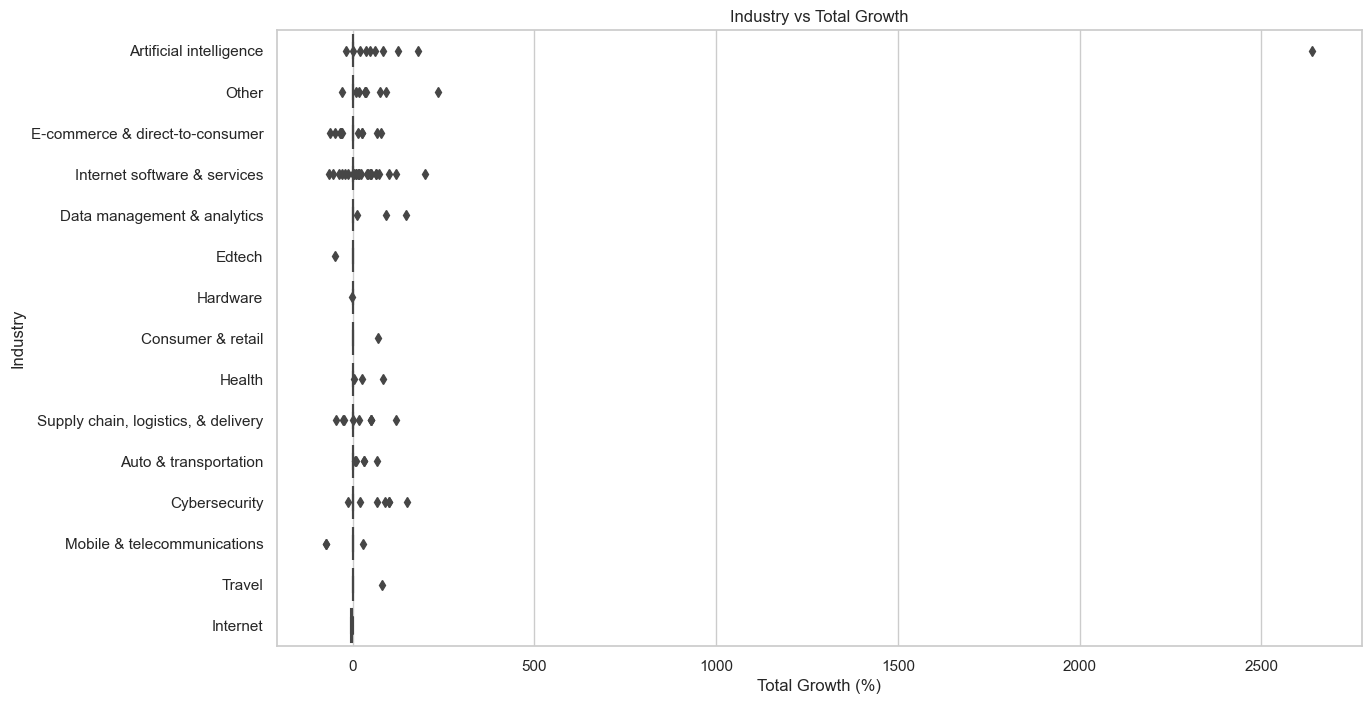

In [11]:
# Industry vs Total Growth
plt.figure(figsize=(14, 8))
sns.boxplot(x='Total Growth', y='Industry', data=cleaned_data)
plt.title('Industry vs Total Growth')
plt.xlabel('Total Growth (%)')
plt.ylabel('Industry')
plt.show()

In [12]:
# Further analysis on the relationship between "Date Joined", "Industry", and "Total Growth"

# Convert 'Date Joined' to datetime format
cleaned_data['Date Joined'] = pd.to_datetime(cleaned_data['Date Joined'])

# Extract year from 'Date Joined'
cleaned_data['Year Joined'] = cleaned_data['Date Joined'].dt.year

# Group by 'Year Joined' and 'Industry' to calculate mean and median of 'Total Growth'
date_industry_growth_stats = cleaned_data.groupby(['Year Joined', 'Industry']).agg({
    'Total Growth': ['mean', 'median']
}).reset_index()

/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/1642370956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date Joined'] = pd.to_datetime(cleaned_data['Date Joined'])
/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_33760/1642370956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year Joined'] = cleaned_data['Date Joined'].dt.year


/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075

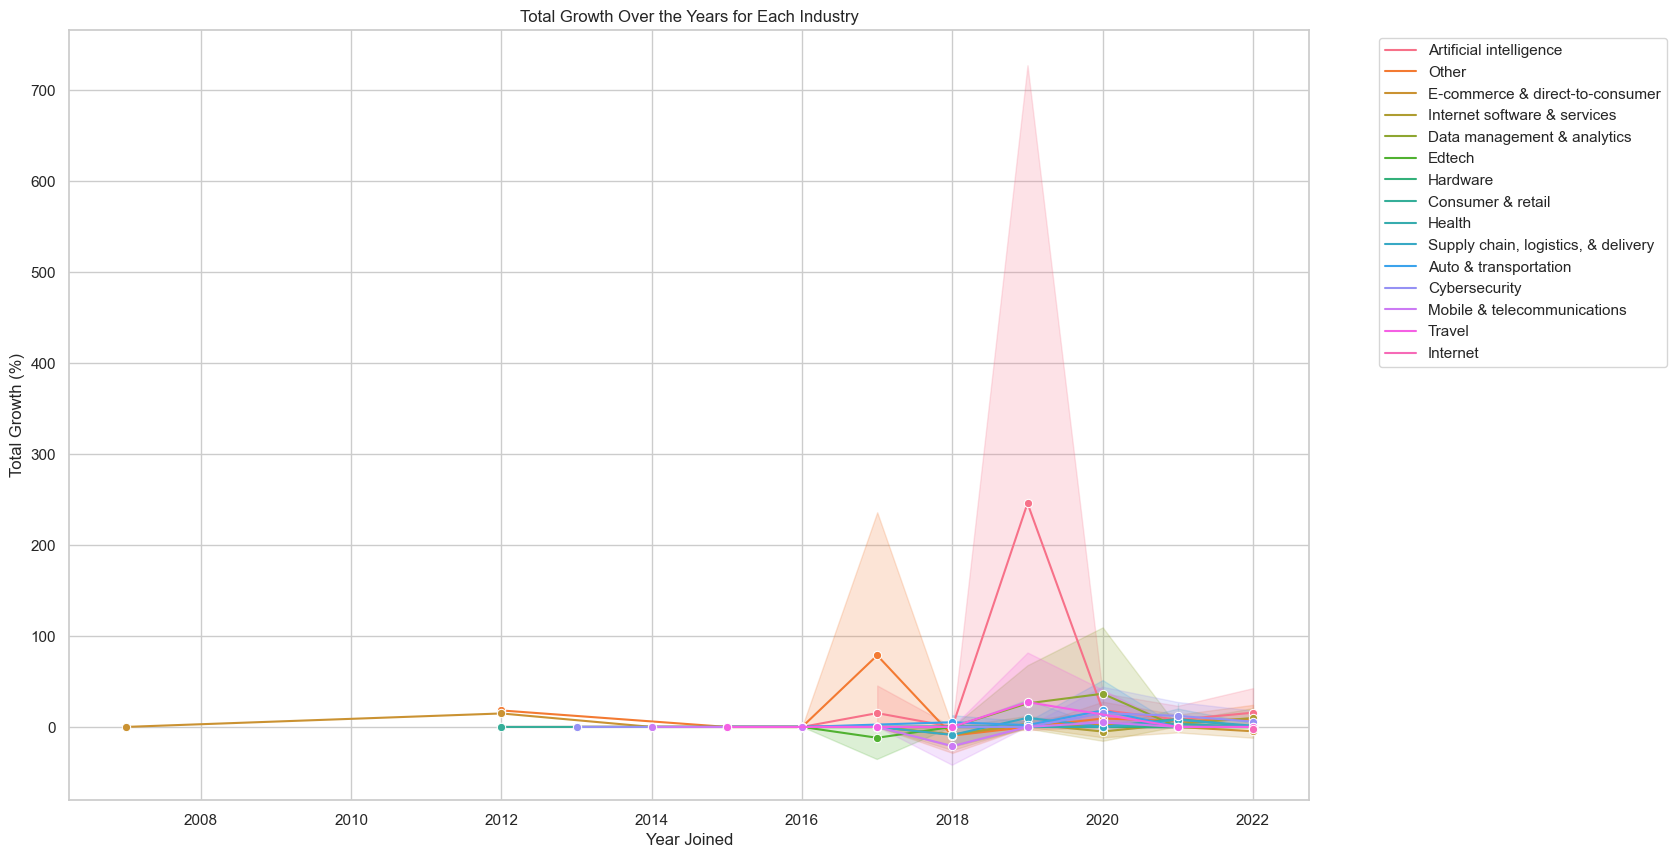

In [13]:
# Plot Total Growth over the years for each Industry
plt.figure(figsize=(16, 10))
sns.lineplot(x='Year Joined', y='Total Growth', hue='Industry', data=cleaned_data, marker='o')
plt.title('Total Growth Over the Years for Each Industry')
plt.xlabel('Year Joined')
plt.ylabel('Total Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

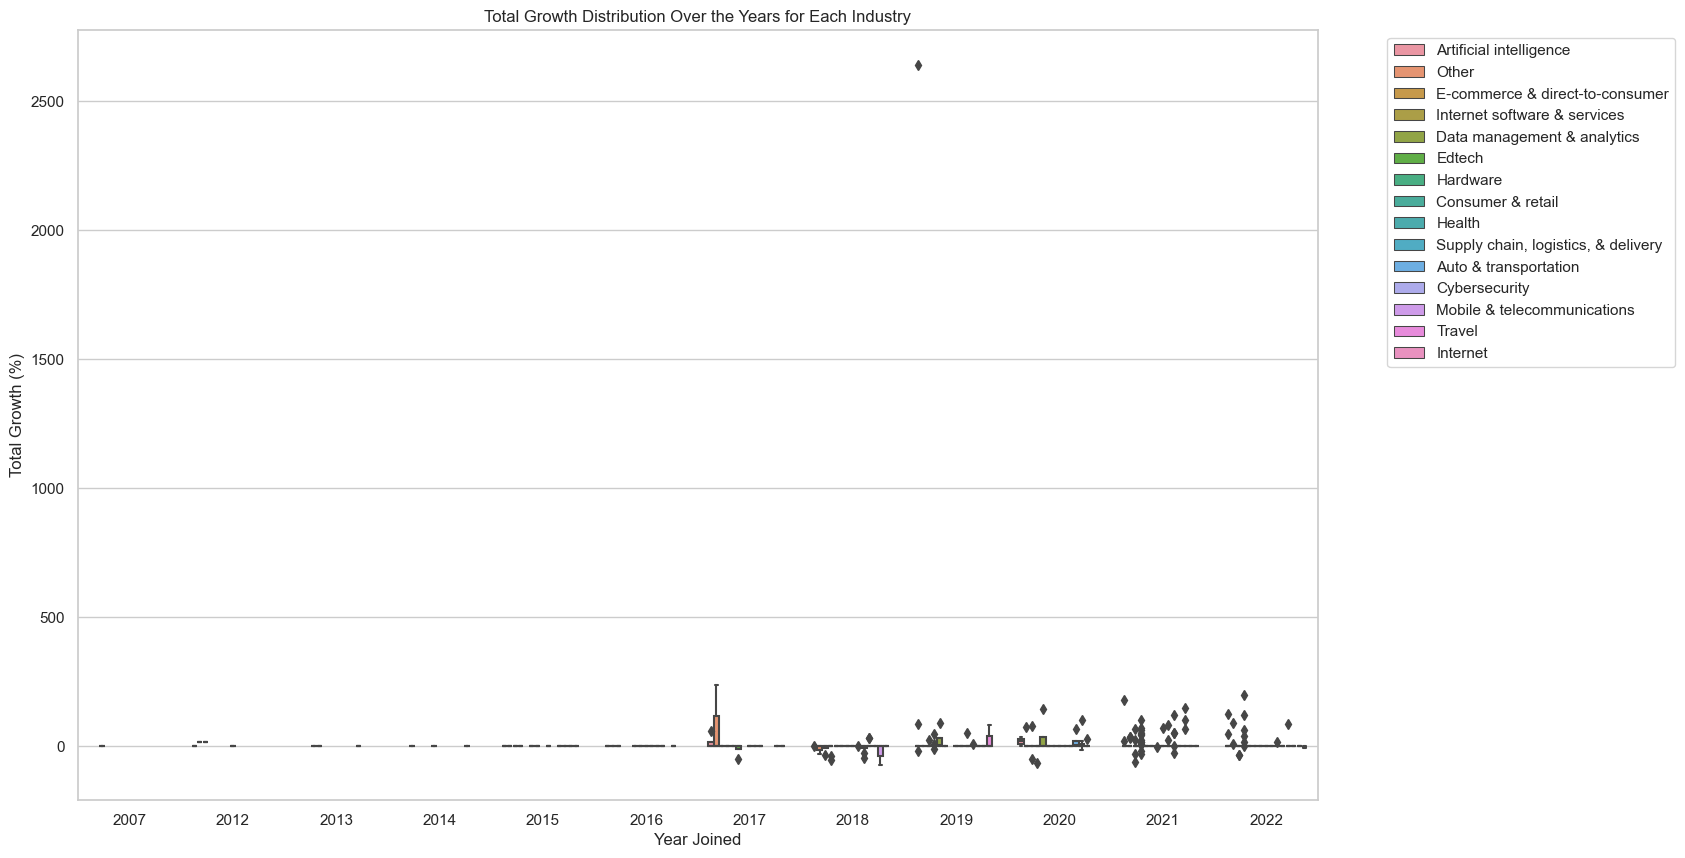

In [14]:
# Plot Total Growth distribution for each Industry over the years
plt.figure(figsize=(16, 10))
sns.boxplot(x='Year Joined', y='Total Growth', hue='Industry', data=cleaned_data)
plt.title('Total Growth Distribution Over the Years for Each Industry')
plt.xlabel('Year Joined')
plt.ylabel('Total Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()